In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact


/home/bhat/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

In [145]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.8 * fs,
          'ytick.labelsize': 0.8 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [153]:
# Define the directory path where the files are located
directory_path=[]

#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss/LOGS_burning_normal_1,2_approx21/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_011_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_095_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_085_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_050_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')


# HEre I plot the difference in HR diagram 

1.1
0.95
0.85
0.64
0.5


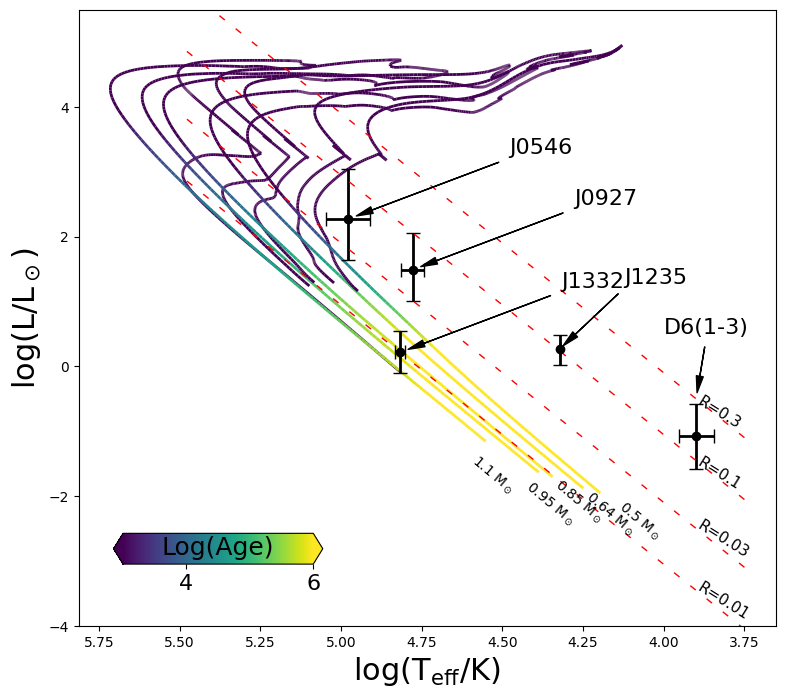

In [147]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(9,8))
plt.rcParams["font.size"]=16
plt.rcParams["axes.labelsize"]=22

#gs = gridspec.GridSpec(1, 1)
#ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=2
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    points = np.array([h.log_Teff, h.log_L]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(np.log10(h.star_age))

    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    lc.set(clim=(3,6))
    #plot1=plt.scatter(h.log_Teff, h.log_L,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
names_d6=np.array(["J1235","J0927", "J0546", "J1332"])#J1235, J0927, J0546, J1332
radii_d6=np.array([0.104,0.052,0.051,0.010])#J1235, J0927, J0546, J1332
radii_d6_error_plus=np.array([0.026,0.025,0.029,0.003])#0.021
radii_d6_error_minus=np.array([0.030,0.020,0.021,0.003])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,-1.08,xerr=(0.125/np.log(10)),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_\mathrm{eff}$/K)',fontsize=22)
plt.ylabel('log(L/L$_\odot$)',fontsize=22)
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]-0.22),rotation=-32,fontsize=11)
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), np.log10(L_D6[2])), xytext=(np.log10(temp_d6[2])-0.5, np.log10(L_D6[2])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), np.log10(L_D6[3])), xytext=(np.log10(temp_d6[3])-0.5, np.log10(L_D6[3])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), np.log10(L_D6[1])), xytext=(np.log10(temp_d6[1])-0.5, np.log10(L_D6[1])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), np.log10(L_D6[0])), xytext=(np.log10(temp_d6[0])-0.2, np.log10(L_D6[0])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,-0.5), xytext=(4.0,0.5),
            arrowprops=dict(facecolor='black', shrink=0.1,width=0.001,headwidth=5)
            )
cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=fig.colorbar(line,ax=ax,extend='both',orientation='horizontal',cax=cbaxes)
#colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed
plt.ylim(-4,5.5)
plt.rcParams["axes.labelsize"]=16
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.png")

# Without heating part

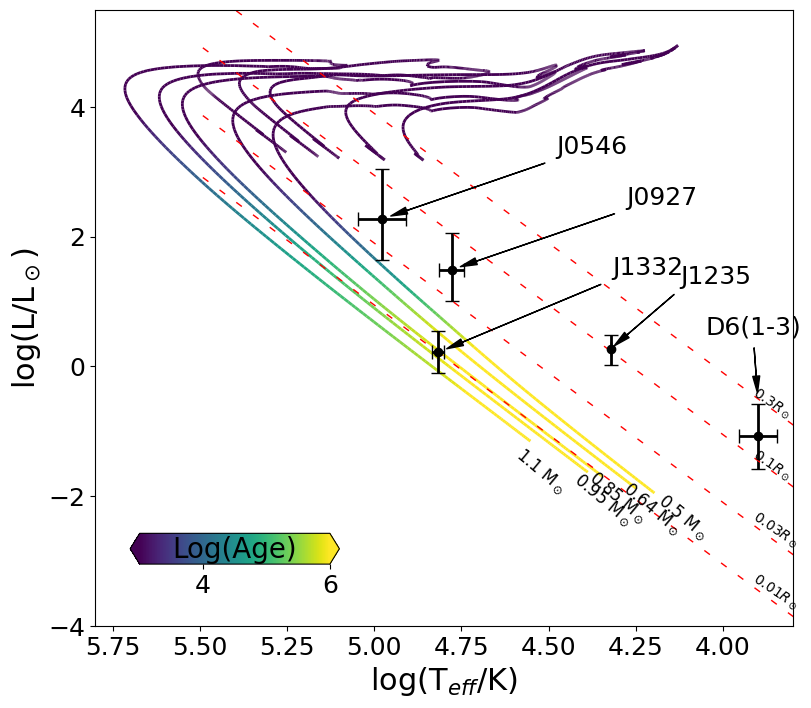

In [155]:
i=0
fig,ax=plt.subplots(figsize=(9,8))
plt.rcParams["font.size"]=18
plt.rcParams["axes.labelsize"]=22
#gs = gridspec.GridSpec(1, 1)
#ax0 = plt.subplot(gs[0,0])
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    mask=h.star_age>=3.2e-10
    points = np.array([h.log_Teff[mask], h.log_L[mask]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(np.log10(h.star_age[mask]))

    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    lc.set(clim=(3,6))
    #plot1=plt.scatter(h.log_Teff[mask], h.log_L[mask],c=np.log10(h.star_age[mask]),vmin=4.0,vmax=6.0,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=12)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=12)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=12)
    i=i+1


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,-1.08,xerr=(0.125/np.log(10)),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.xlim(3.8,5.8)

plt.gca().invert_xaxis()
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(L/L$_\odot$)')
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("{}$R_\odot$".format(r[i]),(logt[1]+0.08,logl[1]-0.05),rotation=-34,fontsize=10)
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), np.log10(L_D6[2])), xytext=(np.log10(temp_d6[2])-0.5, np.log10(L_D6[2])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), np.log10(L_D6[3])), xytext=(np.log10(temp_d6[3])-0.5, np.log10(L_D6[3])+1.2),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), np.log10(L_D6[1])), xytext=(np.log10(temp_d6[1])-0.5, np.log10(L_D6[1])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), np.log10(L_D6[0])), xytext=(np.log10(temp_d6[0])-0.2, np.log10(L_D6[0])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,-0.5), xytext=(4.05,0.5),
            arrowprops=dict(facecolor='black', shrink=0.1,width=0.001,headwidth=5)
            )
cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=fig.colorbar(line,ax=ax,extend='both',orientation='horizontal',cax=cbaxes)
#colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-45,fontsize=20)  # Adjust the value of 'labelpad' as needed
plt.ylim(-4,5.5)
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid2.png")

1.1
0.95
0.85
0.64
0.5


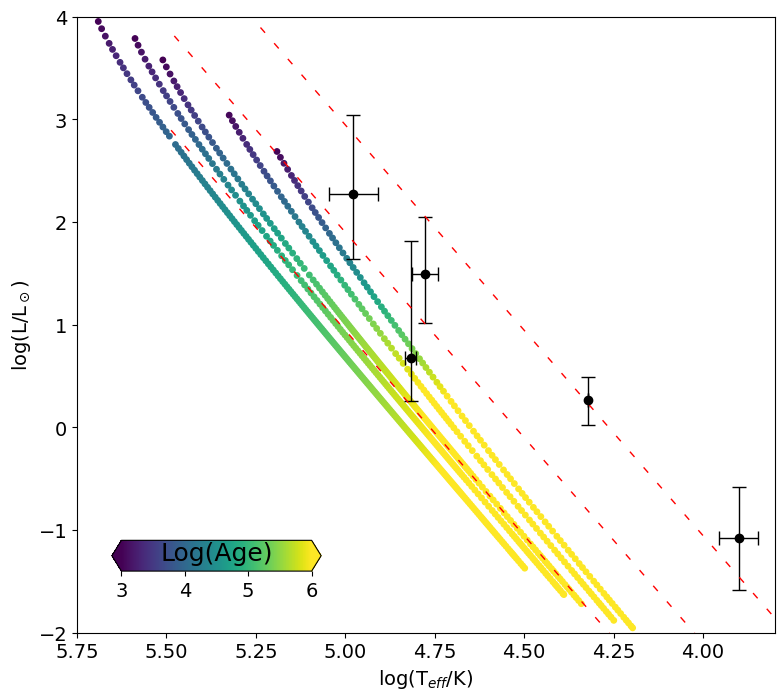

In [13]:

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter(h.log_Teff[h.star_age>=10**3], h.log_L[h.star_age>=10**3],c=np.log10(h.star_age[h.star_age>=10**3]),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    
radii_d6=np.array([0.104,0.052,0.051,0.017])#J1235, J0927, J0546, J1332
radii_d6_error_plus=np.array([0.026,0.025,0.029,0.021])
radii_d6_error_minus=np.array([0.030,0.020,0.021,0.007])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#

#plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5,c='white')#
#plt.errorbar(np.log10(65657),1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(95000),2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(60000),0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5,c='white')
plt.errorbar(3.9,-1.08,xerr=([0.125/np.log(10)],[0.125/np.log(10)]),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(L/L$_\odot$)')
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    #plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]+0.3),rotation=-30,fontsize=11)

cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed
plt.ylim(-2,4)
plt.xlim(3.8,5.75)
plt.gca().invert_xaxis()





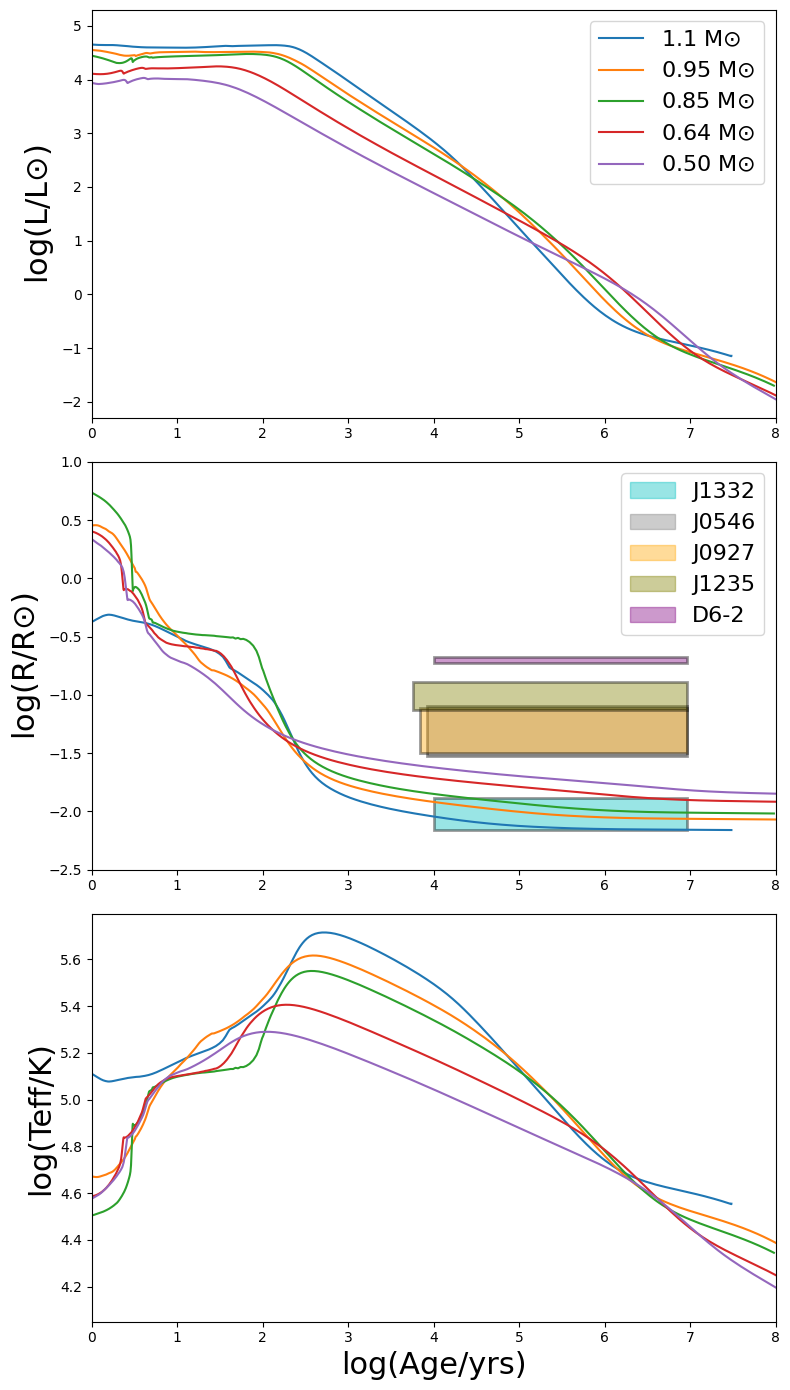

In [156]:
import matplotlib.patches as mpatches
plt.style.use('default')
figs, axs=plt.subplots(3,1,figsize=(8,14))
colors=['olive','orange','grey','c','purple'] 
handle=[] 
for i in range(4):
    axs[1].axhspan(xmin=0.5-(i/100),xmax=0.87,ymin=np.log10(radii_d6[3-i]-radii_d6_error_minus[3-i]),ymax=np.log10(radii_d6[3-i]+radii_d6_error_plus[3-i]),alpha=(0.4),
                   lw=2,ec='k',color=colors[3-i])
    labels_legend = mpatches.Patch(color=colors[3-i], label=names_d6[3-i],alpha=0.4) 
    handle.append(labels_legend)

axs[1].axhspan(xmin=0.5,xmax=0.87,ymin=np.log10(0.19),ymax=np.log10(0.21),alpha=(0.4),
                   lw=2,ec='k',color=colors[4])
labels_legend = mpatches.Patch(color=colors[4], label="D6-2",alpha=0.4) 
handle.append(labels_legend)

axs[1].legend(handles=handle,fontsize=16)
#axs[1].legend() 
for i in range(1):
    for directory in directory_path:
        h = MesaData(os.path.join(directory, 'history.data'))
        axs[i].plot(np.log10(h.star_age), h.log_L)
        axs[i].set_ylabel("log(L/L$\odot$)",fontsize=22)
        axs[i+1].plot(np.log10(h.star_age), h.log_R)
        axs[i+1].set_ylabel("log(R/R$\odot$)",fontsize=22)
        axs[i+2].plot(np.log10(h.star_age), h.log_Teff)
        axs[i+2].set_ylabel("log(Teff/K)",fontsize=22)
        axs[i].set_xlim(0,8)
        axs[i+1].set_xlim(0,8)
        axs[i+2].set_xlim(0,8)
        axs[i+1].set_ylim(-2.5,1)


plt.xlabel('log(Age/yrs)',fontsize=22)
plt.tight_layout()
axs[0].legend(('1.1 M$\odot$','0.95 M$\odot$','0.85 M$\odot$','0.64 M$\odot$','0.50 M$\odot$'),fontsize=16,loc='best')
plt.savefig("../../../D6_MESA/Plots/plots_paper/LRT_grid2.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/LRT_grid2.png",bbox_inches='tight')



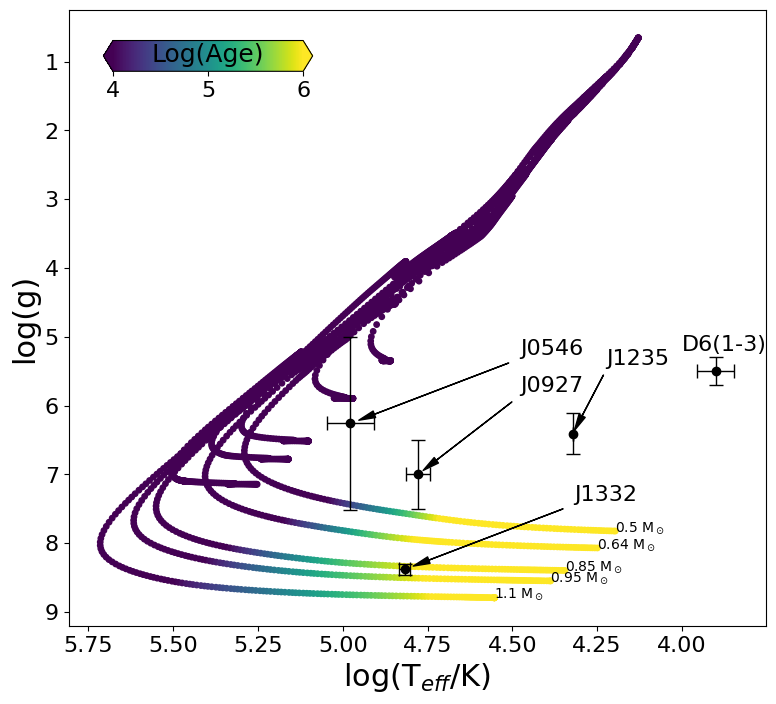

In [120]:

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=16
plt.rcParams["axes.labelsize"]=22
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    mask=h.star_age>=3.2e-10
    plot1=plt.scatter(h.log_Teff[mask], h.log_g[mask],c=np.log10(h.star_age[mask]),vmin=4,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    i=i+1
    
logg_d6=np.array([6.41,7.0,6.26,8.38])#J1235, J0927, J0546, J1332
logg_d6_error=np.array([0.3,0.5,1.26,0.08])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),logg_d6[i],xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=(logg_d6_error[i]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,5.5,xerr=([0.125]/np.log(10)),yerr=0.2,marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(g)')
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), logg_d6[2]), xytext=(np.log10(temp_d6[2])-0.5, logg_d6[2]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), logg_d6[3]), xytext=(np.log10(temp_d6[3])-0.5, logg_d6[3]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), logg_d6[1]), xytext=(np.log10(temp_d6[1])-0.3, logg_d6[1]-1.2),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), logg_d6[0]), xytext=(np.log10(temp_d6[0])-0.1, logg_d6[0]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,5.5), xytext=(4,5.2)
            
            )
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed
plt.savefig("../../Plots/plots_paper/kiel_grid2.png",bbox_inches='tight')
plt.savefig("../../Plots/plots_paper/kiel_grid2.pdf",bbox_inches='tight')


(0.0, 3.0)

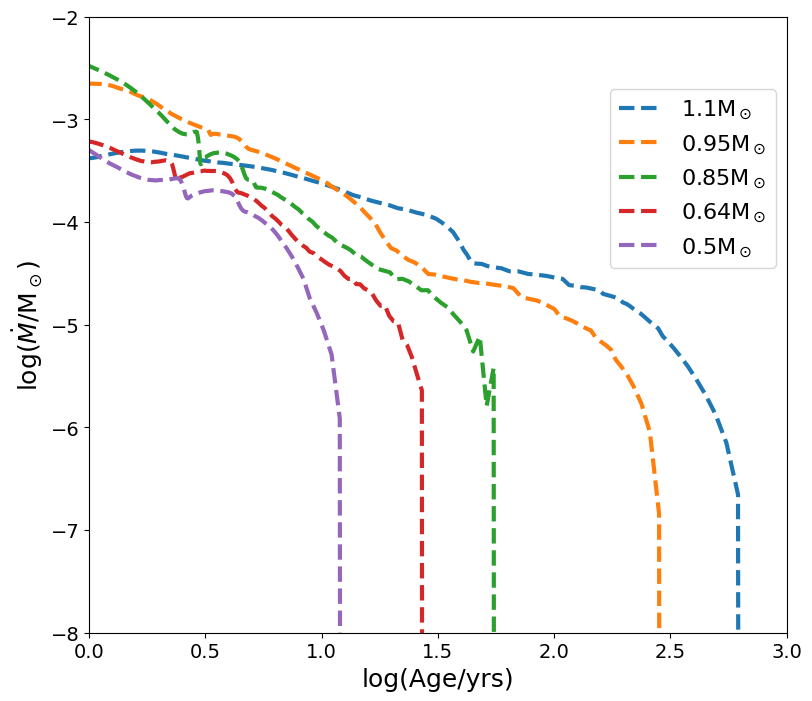

In [166]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=3
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(str(h.star_mass[0])+"M$_\odot$")
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.plot(np.log10(h.star_age), h.log_abs_mdot)
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''



plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(Age/yrs)')
plt.ylabel('log($\dot{M}$/M$_\odot$)')

plt.ylim(-8,-2)
plt.xlim(0,3)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

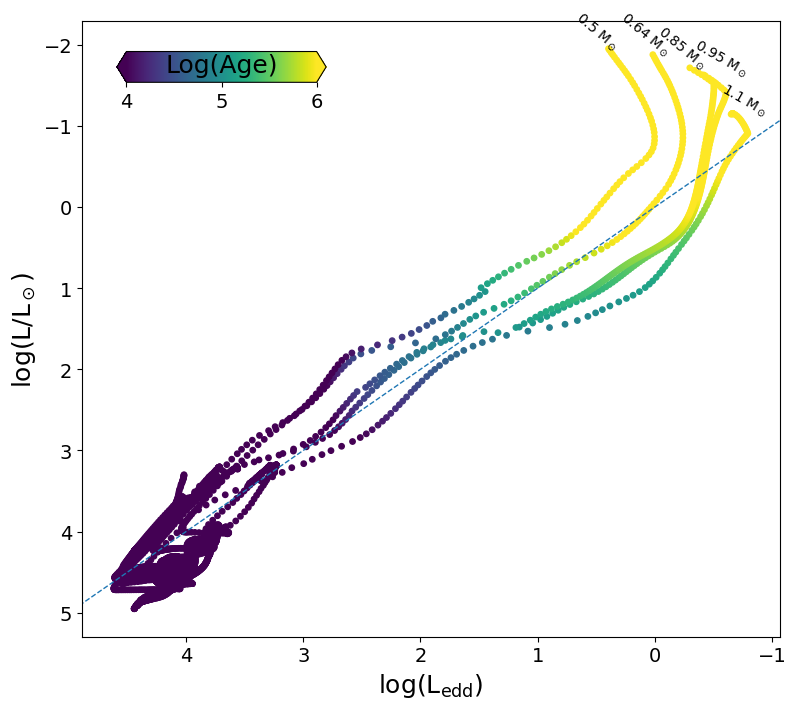

In [76]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass_star=h.star_mass[0]
    mass.append(mass_star)
    mask=h.star_age>=3.2e-10

    
    plot1=plt.scatter( h.log_Ledd[mask],(h.log_L[mask]),s=15,c=np.log10(h.star_age[mask]),vmin=4,vmax=6,cmap='viridis')
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass_star),(h.log_Ledd[-1]+0.3,h.log_L[-1]),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass_star),(h.log_Ledd[-1]+0.3,h.log_L[-1]),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass_star),(h.log_Ledd[-1]+0.1,h.log_L[-1]),rotation=-30,fontsize=10)
    i=i+1
    

plt.axline((0,0),slope=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.ylabel('log(L/L$_\odot$)')
plt.xlabel('log(L$_\mathrm{edd}$)')
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)
#plt.ylim(-15,0)
#plt.xlim(0,8)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

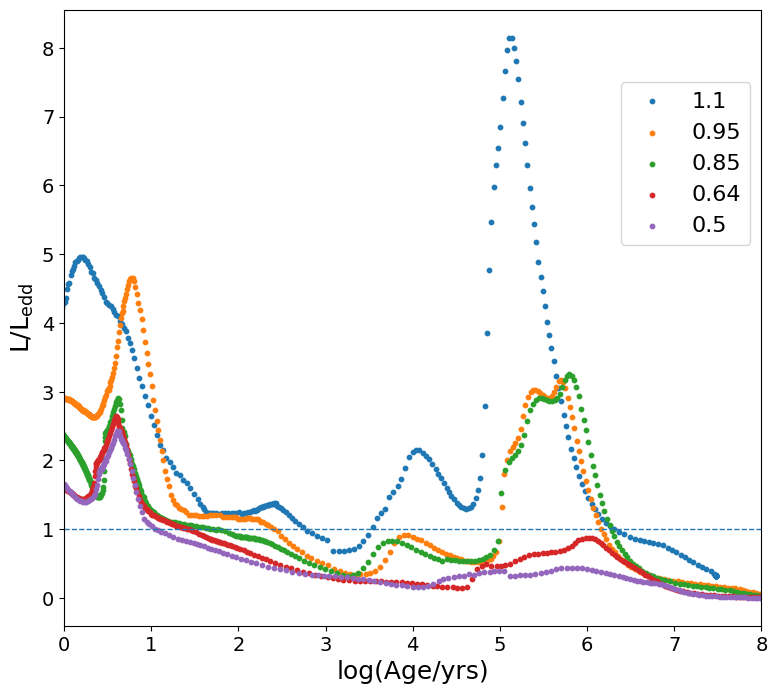

In [167]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18
%matplotlib inline
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter(np.log10(h.star_age), np.power(10,h.log_L_div_Ledd),s=10)
    #plot1=plt.scatter(np.log10(h.star_age), h.log_L,s=10)
    
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''


plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(Age/yrs)')
plt.ylabel('L/L$_\mathrm{edd}$')
plt.xlim(0,8)
plt.axhline(y=1)
plt.show()


#plt.ylim(-15,0)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

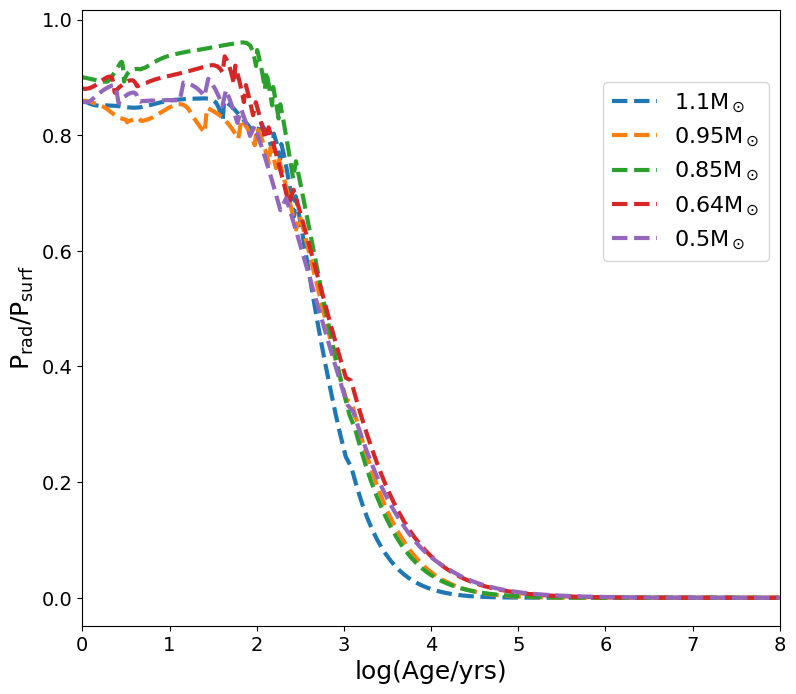

In [171]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18
%matplotlib inline
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=3
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(str(h.star_mass[0])+"M$_\odot$")
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    #plot1=plt.scatter(np.log10(h.star_age), np.power(10,h.log_L)/(2.99792e10*4*np.pi*np.square(np.power(10,h.log_R))),s=10)
    if(h.star_mass[0]>0.4):
        plot1=plt.plot(np.log10(h.star_age),(5.67e-5*np.power(np.power(10,h.log_Teff),4)*4)/(2.99792e10*3*np.power(10,h.log_surf_cell_pressure)))
    
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''


plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(Age/yrs)')
plt.ylabel('P$_\mathrm{rad}$/P$_\mathrm{surf}$')
plt.xlim(0,8)
plt.show()


#plt.ylim(-15,0)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

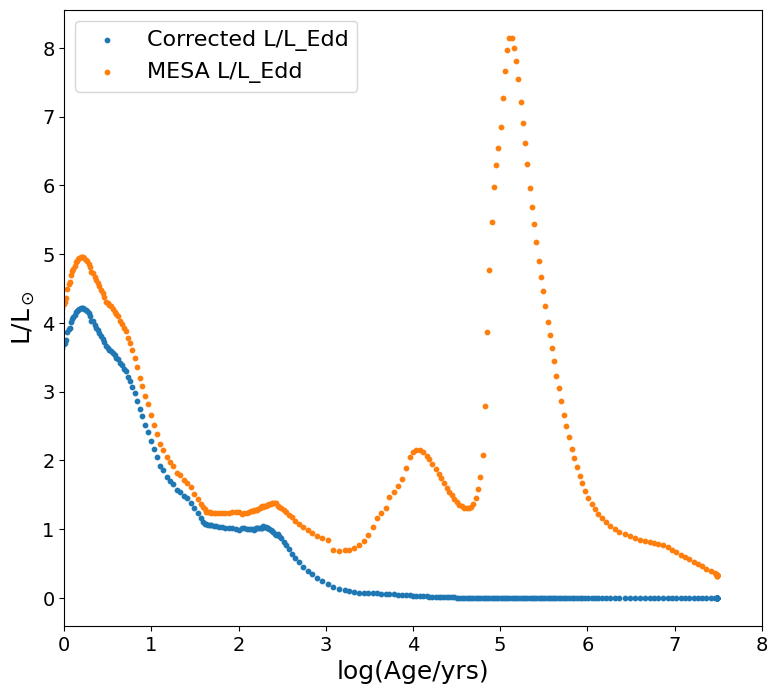

In [97]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18
%matplotlib inline
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    #plot1=plt.scatter(np.log10(h.star_age), np.power(10,h.log_L)/(2.99792e10*4*np.pi*np.square(np.power(10,h.log_R))),s=10)
    if(h.star_mass[0]>1):
        plot1=plt.scatter(np.log10(h.star_age),(np.power(10,h.log_L_div_Ledd)*(5.67e-5*np.power(np.power(10,h.log_Teff),4)*4))/(2.99792e10*3*np.power(10,h.log_surf_cell_pressure)),s=10)
        plot2=plt.scatter(np.log10(h.star_age),np.power(10,h.log_L_div_Ledd),s=10)

    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''


plt.legend(["Corrected L/L_Edd","MESA L/L_Edd"],loc="best",fontsize=16)
plt.xlabel('log(Age/yrs)')
plt.ylabel('L/L$_\odot$')
plt.xlim(0,8)
plt.show()


#plt.ylim(-15,0)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

(0.0, 8.0)

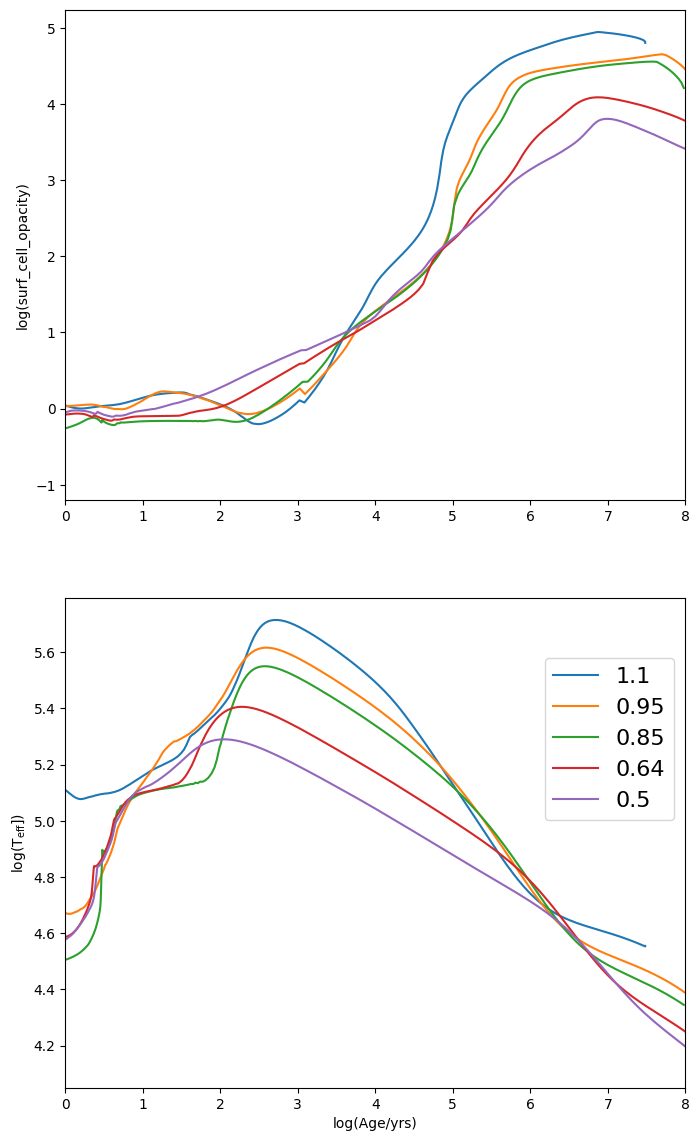

In [172]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
figs, axs=plt.subplots(2,1,figsize=(8,14))
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    axs[0].plot(np.log10(h.star_age), h.log_surf_cell_opacity)
    axs[1].plot(np.log10(h.star_age), h.log_Teff)


    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''


plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(Age/yrs)')
axs[0].set_ylabel('log(surf_cell_opacity)')
axs[1].set_ylabel('log(T$_\mathrm{eff}}$])')
axs[0].set_xlim(0,8)

plt.xlim(0,8)

#plt.ylim(-15,0)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

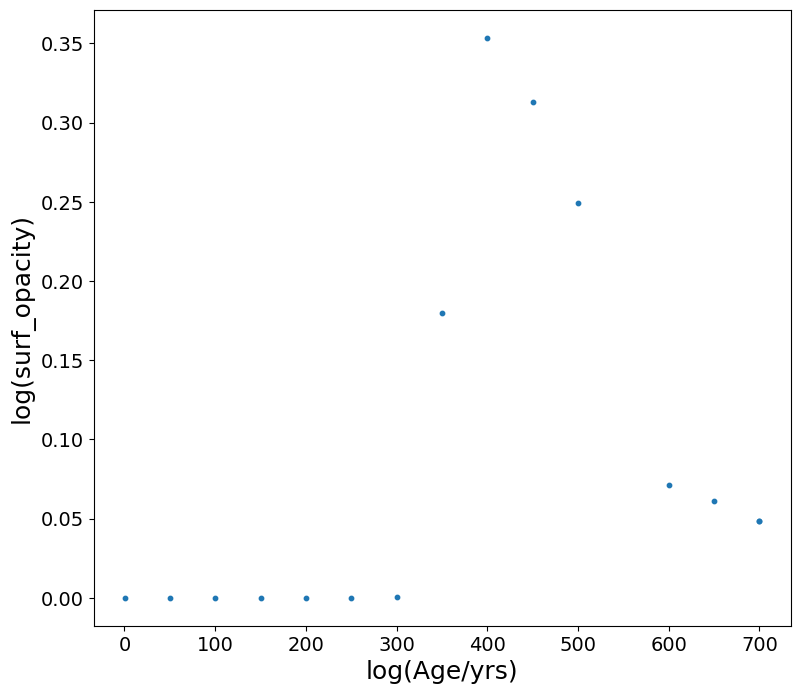

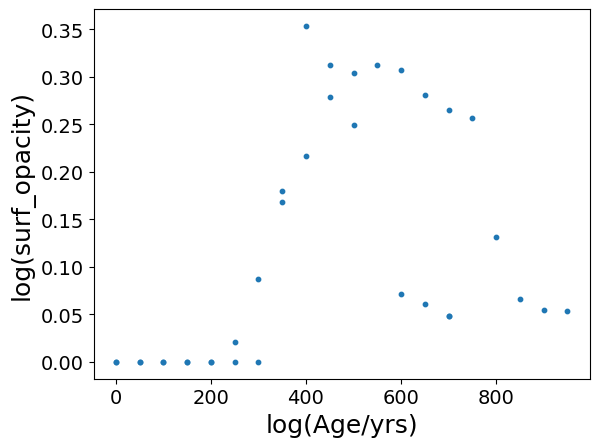

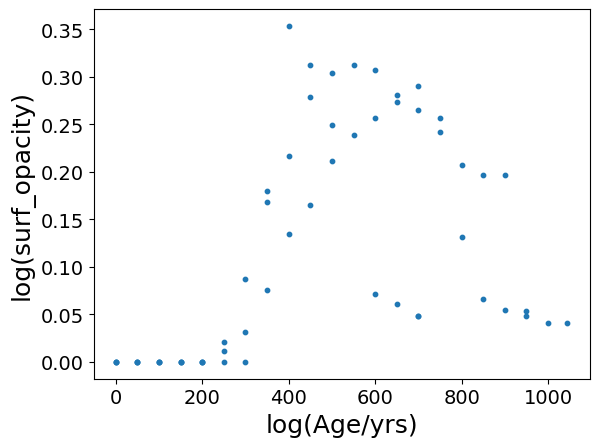

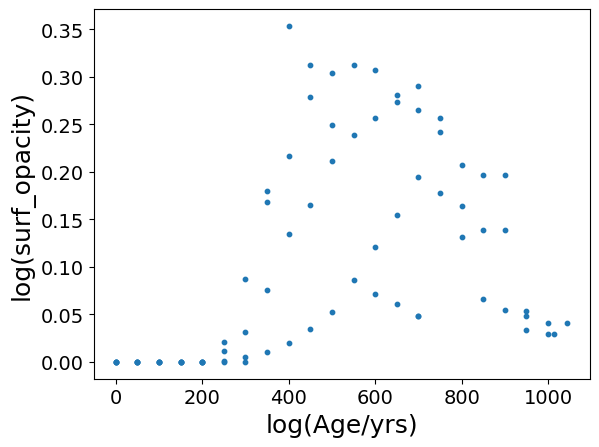

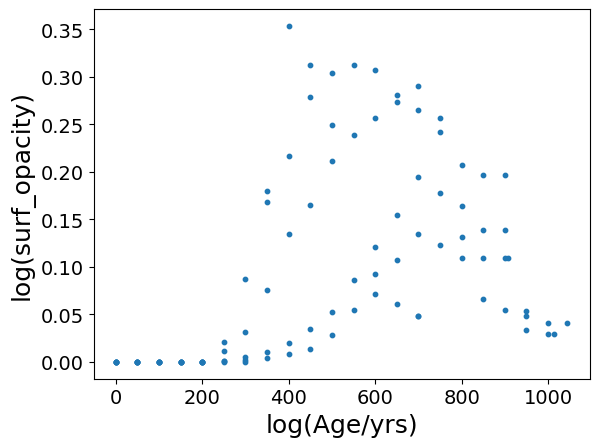

In [44]:

i=0
fig=plt.figure(figsize=(9,8))
%matplotlib inline
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
colors=('m','g','b','r')
logiron=[]
age=[]

for directory in directory_path:
    file_pattern = os.path.join(directory, 'profile*.data')
    data_files = glob.glob(file_pattern)
    
    for data in data_files:
        h = MesaData(data)
        logiron.append(h.fe56[np.where(h.zone==np.min(h.zone))])
        age.append(h.model_number)

    #mass.append(h.star_mass[0])
    plot1=plt.scatter(age, logiron,s=10)
    #plot1=plt.scatter(np.log10(h.star_age), h.log_L,s=10)
    #plt.legend(["L_edd","L"],loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
    plt.xlabel('log(Age/yrs)')
    plt.ylabel('log(surf_opacity)')

    plt.show()
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''





#plt.ylim(-15,0)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

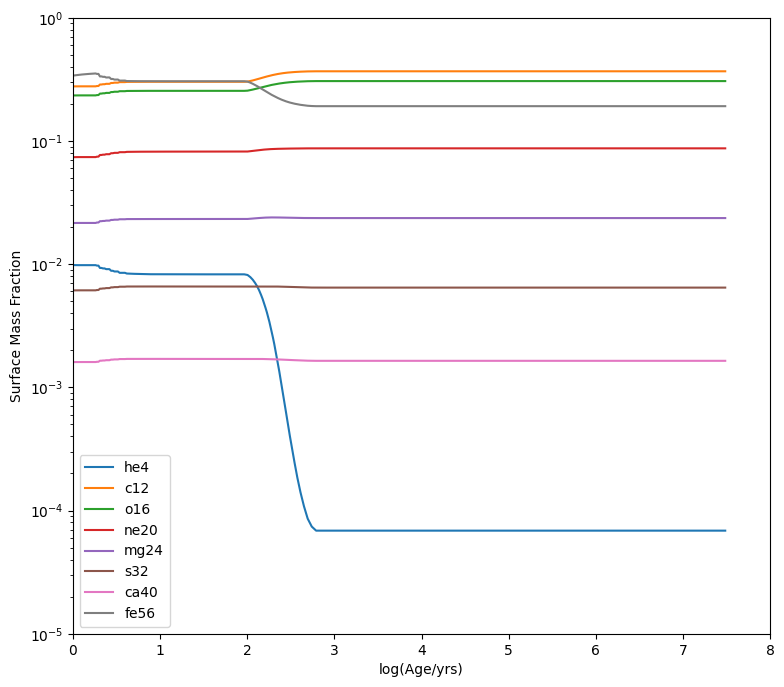

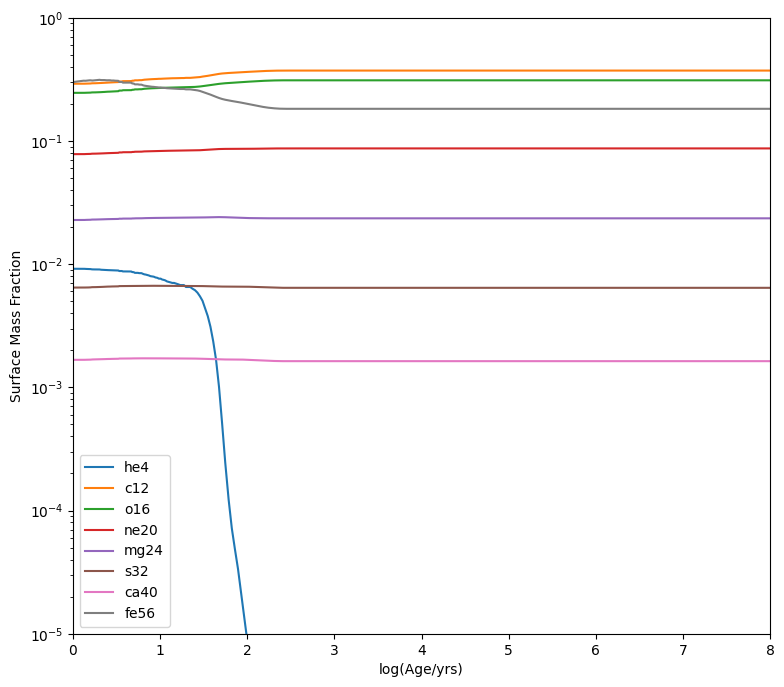

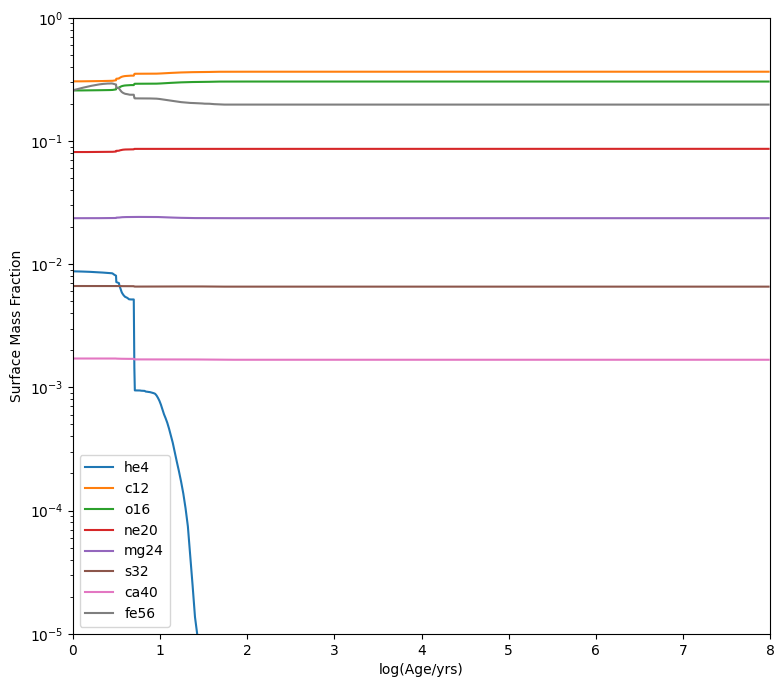

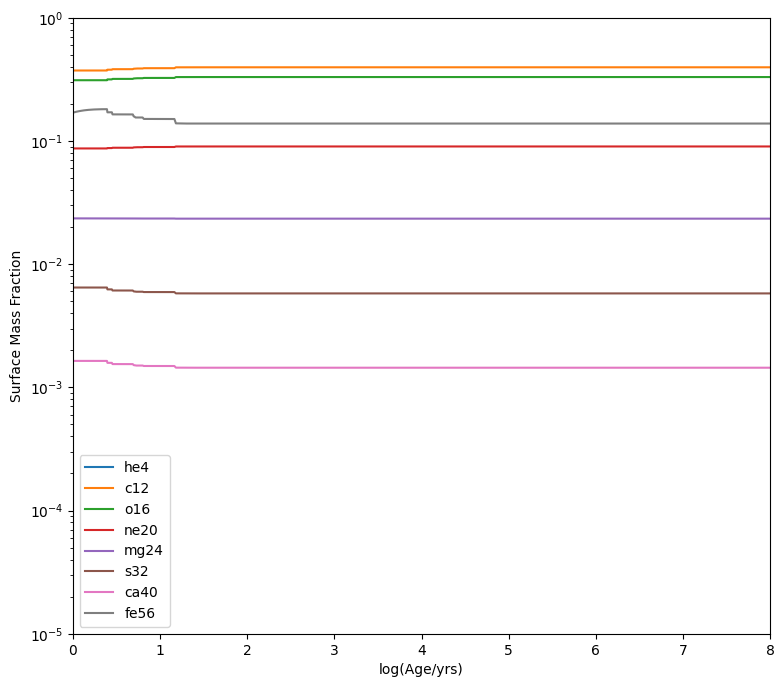

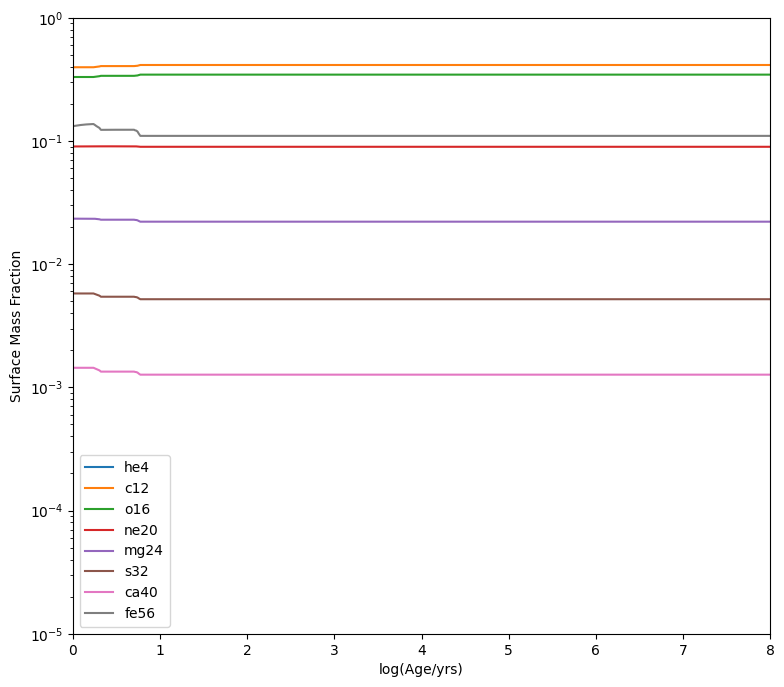

In [173]:

i=0
%matplotlib inline
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    fig=plt.figure(figsize=(9,8))
    #plot1=plt.scatter(np.log10(h.star_age), h.surface_h1,s=10)
    plot1=plt.plot(np.log10(h.star_age), h.surface_he4)
    plot1=plt.plot(np.log10(h.star_age), h.surface_c12)
    plot1=plt.plot(np.log10(h.star_age), h.surface_o16)
    plot1=plt.plot(np.log10(h.star_age), h.surface_ne20)
    plot1=plt.plot(np.log10(h.star_age), h.surface_mg24)
    plot1=plt.plot(np.log10(h.star_age), h.surface_s32)

    plot1=plt.plot(np.log10(h.star_age), h.surface_ca40)
    plot1=plt.plot(np.log10(h.star_age), h.surface_fe56)
    #plot1=plt.scatter(np.log10(h.star_age), h.surface_ni56,s=8)
    #plot1=plt.scatter(np.log10(h.star_age), h.surface_co56,s=8)
    plt.yscale("log")
    plt.xlabel('log(Age/yrs)')
    plt.ylabel('Surface Mass Fraction')
    plt.xlim(0,8)
    plt.ylim(10e-6,1)
    plt.legend(["he4","c12","o16","ne20","mg24","s32","ca40","fe56"])

    plt.show()
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''



#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")